# Introduction


**What?** Learning pyTorch with examples



# Goal?


- We will use a problem of fitting y=sin(x) with a third order polynomial as our running example. 
- The network will have four parameters, and will be trained with gradient descent to fit random data by minimizing the Euclidean 
distance between the network output and the true output.

- This turtial will go throug 5 examples (essentially our polynomial model studied in 5 different forms):
    - implementation in numpy
    - implementation using pytorch tensor
    - implementation using pytorch autograd
    - defining a new autograd functions
    - casting the problem via ANNs
    - ANNs + better optimiser
    - Custom modules  



# Import modules

In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
import torch

# [1] Using numpy

In [3]:
"""
Numpy provides an n-dimensional array object, and many functions for manipulating these arrays. Numpy is 
a generic framework for scientific computing; it does not know anything about computation graphs, or deep
learning, or gradients. However we can easily use numpy to fit a third order polynomial to sine function 
by manually implementing the forward and backward passes through the network using numpy operations:
"""

'\nNumpy provides an n-dimensional array object, and many functions for manipulating these arrays. Numpy is \na generic framework for scientific computing; it does not know anything about computation graphs, or deep\nlearning, or gradients. However we can easily use numpy to fit a third order polynomial to sine function \nby manually implementing the forward and backward passes through the network using numpy operations:\n'

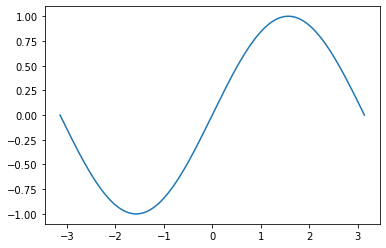

In [4]:
# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

plt.plot(x, y)

In [5]:
%%time

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

lossHistory = []
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    lossHistory.append(loss)
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 588.7638628208108
199 395.6880576519785
299 267.02906022141894
399 181.2535561535533
499 124.03933124298229
599 85.85601553195787
699 60.359330352535714
799 43.32417262305322
899 31.935499657846712
999 24.316867057601137
1099 19.216863029343955
1199 15.80048127416149
1299 13.510259240189525
1399 11.973813905567756
1499 10.942245583868402
1599 10.249086003797728
1699 9.782925262141015
1799 9.469150430807717
1899 9.257756303290568
1999 9.11520464401846
Result: y = -0.010697924648656862 + 0.8431353837612463 x + 0.0018455700161278468 x^2 + -0.09139513093077237 x^3
CPU times: user 329 ms, sys: 5.71 ms, total: 335 ms
Wall time: 332 ms


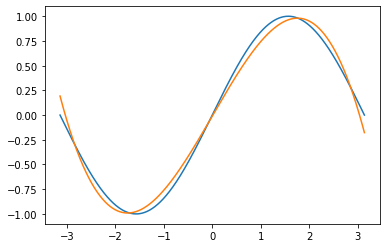

In [6]:
yPred = a + b * x + c * x ** 2 + d * x ** 3

plt.plot(x, y)
plt.plot(x, yPred)

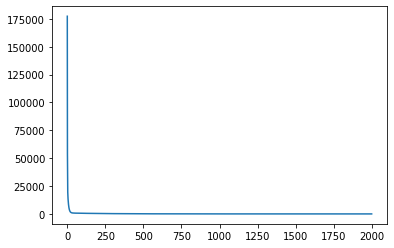

In [7]:
plt.plot(range(2000), lossHistory)

# [2] Using pyTorch + tensor

In [8]:
"""
Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep 
neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern
deep learning.

Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a 
generic tool for scientific computing.
"""

'\nNumpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep \nneural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern\ndeep learning.\n\nBehind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a \ngeneric tool for scientific computing.\n'

In [9]:
%%time

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU


# Create random input and output data
""" In numpy
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)
"""
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)


# Randomly initialize weights
"""In numpy
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()
"""

a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    """ In numpy
    loss = np.square(y_pred - y).sum()
    """
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 6721.65771484375
199 4728.43994140625
299 3328.3466796875
399 2344.4521484375
499 1652.7484130859375
599 1166.2733154296875
699 824.0086669921875
799 583.12060546875
899 413.525634765625
999 294.0868835449219
1099 209.9461669921875
1199 150.6553955078125
1299 108.86461639404297
1399 79.40142059326172
1499 58.62434387207031
1599 43.96947479248047
1699 33.6307258605957
1799 26.335521697998047
1899 21.18695068359375
1999 17.552743911743164
Result: y = 0.09747046232223511 + 0.8411867022514343 x + -0.016815274953842163 x^2 + -0.09111794829368591 x^3
CPU times: user 290 ms, sys: 5.76 ms, total: 296 ms
Wall time: 294 ms


# [3] Using pyTorch + tensor + autograd

In [10]:
"""
we can use automatic differentiation to automate the computation of backward passes in neural networks. 
The autograd package in PyTorch provides exactly this functionality. When using autograd, the forward pass
of your network will define a computational graph; nodes in the graph will be Tensors, and edges will be 
functions that produce output Tensors from input Tensors. Backpropagating through this graph then allows 
you to easily compute gradients.
"""

'\nwe can use automatic differentiation to automate the computation of backward passes in neural networks. \nThe autograd package in PyTorch provides exactly this functionality. When using autograd, the forward pass\nof your network will define a computational graph; nodes in the graph will be Tensors, and edges will be \nfunctions that produce output Tensors from input Tensors. Backpropagating through this graph then allows \nyou to easily compute gradients.\n'

In [11]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 1080.26904296875
199 756.07373046875
299 530.3681640625
399 373.1021728515625
499 263.4356689453125
599 186.90335083007812
699 133.454833984375
799 96.10128784179688
899 69.97823333740234
999 51.69741439819336
1099 38.89659881591797
1199 29.92780876159668
1299 23.640342712402344
1399 19.23026466369629
1499 16.135406494140625
1599 13.962450981140137
1699 12.436095237731934
1799 11.36347484588623
1899 10.609386444091797
1999 10.079031944274902
Result: y = -0.03621547296643257 + 0.8474550843238831 x + 0.0062477728351950645 x^2 + -0.09200956672430038 x^3


# [4] Defining new autograd functions

In [16]:
class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)

In [17]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For this example, we need
# 4 weights: y = a + b * P3(c + d * x), these weights need to be initialized
# not too far from the correct result to ensure convergence.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-6
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_pred = a + b * P3(c + d * x)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03519439697266
499 50.97850799560547
599 37.403133392333984
699 28.206867218017578
799 21.973188400268555
899 17.7457275390625
999 14.877889633178711
1099 12.931766510009766
1199 11.610918045043945
1299 10.714258193969727
1399 10.10548210144043
1499 9.692106246948242
1599 9.411375999450684
1699 9.220745086669922
1799 9.091285705566406
1899 9.003361701965332
1999 8.943639755249023
Result: y = -6.8844756562214116e-09 + -2.208526849746704 * P3(1.5037101563919464e-09 + 0.2554861009120941 x)


# [5] casting the problem via ANNs

In [ ]:
"""
In PyTorch, the nn package serves as a higher-level abstractions over raw computational graphs that are useful 
for building neural networks.

he nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives 
input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable 
parameters. The nn package also defines a set of useful loss functions that are commonly used when training neural
networks.
"""

In [18]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3). y = a + b x + c x^2 + d x^3
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 452.5632629394531
199 306.99322509765625
299 209.34689331054688
399 143.79571533203125
499 99.75479125976562
599 70.14055633544922
699 50.21009063720703
799 36.78466796875
899 27.732685089111328
999 21.623727798461914
1099 17.496837615966797
1199 14.706178665161133
1299 12.817121505737305
1399 11.537030220031738
1499 10.668681144714355
1599 10.079001426696777
1699 9.678099632263184
1799 9.40523910522461
1899 9.219320297241211
1999 9.092498779296875
Result: y = 0.01267680898308754 + 0.8455767035484314 x + -0.0021869605407118797 x^2 + -0.0917423814535141 x^3


# [6] ANNs + better optimiser

In [ ]:
"""
Up to this point we have updated the weights of our models by manually mutating the Tensors holding learnable 
parameters with torch.no_grad(). This is not a huge burden for simple optimization algorithms like stochastic 
gradient descent, but in practice we often train neural networks using more sophisticated optimizers like 
AdaGrad, RMSProp, Adam, etc.
"""

In [23]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item():.3f} + {linear_layer.weight[:, 0].item():.3f} x + \
      {linear_layer.weight[:, 1].item():.3f} x^2 + {linear_layer.weight[:, 2].item():.3f} x^3')

99 10463.421875
199 3648.615478515625
299 1440.2667236328125
399 963.7111206054688
499 870.2399291992188
599 783.1456909179688
699 673.8571166992188
799 553.2783203125
899 435.18182373046875
999 328.76507568359375
1099 238.00209045410156
1199 163.9046173095703
1299 106.1722183227539
1399 63.81937026977539
1499 35.486385345458984
1599 19.025775909423828
1699 11.488919258117676
1799 9.209315299987793
1899 8.89222526550293
1999 8.92935848236084
Result: y = -0.000 + 0.856 x +       -0.000 x^2 + -0.094 x^3


# [7] Custom modules

In [25]:
class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'

In [ ]:
"""
__mro__ tells you exactly where Python will look for a method you’re calling with super() and in what order.
"""

In [28]:
a= Polynomial3
a.__mro__

(__main__.Polynomial3, torch.nn.modules.module.Module, object)

In [26]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()


# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the nn.Linear
# module which is members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

99 337.71246337890625
199 236.95204162597656
299 167.2097930908203
399 118.88874816894531
499 85.37713623046875
599 62.113922119140625
699 45.950157165527344
799 34.70914077758789
899 26.884944915771484
999 21.434431076049805
1099 17.634435653686523
1199 14.983078002929688
1299 13.13180160522461
1399 11.83821964263916
1499 10.933727264404297
1599 10.300882339477539
1699 9.857810020446777
1799 9.547423362731934
1899 9.329864501953125
1999 9.177288055419922
Result: y = -0.018986403942108154 + 0.8627626895904541 x + 0.0032754705753177404 x^2 + -0.0941869467496872 x^3


# References


- https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

